In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/content/klasifikasi__UKT_komplit.csv')
dataset.head(10)

,No.,StatusOrtu,Penghasilan,Status_Rumah,JMotor,Jmobil,DayaLis,KIPK
0,1,1,4000000,1,1,0,2,0
1,2,1,2500000,0,1,0,3,0
2,3,1,6000000,1,2,0,2,0
3,4,1,5440500,1,2,0,2,0
4,5,1,10000000,0,1,1,3,0
5,6,1,1000000,0,1,0,3,1
6,7,1,20000000,1,2,1,3,0
7,8,1,15000000,1,1,0,3,0
8,9,4,4000000,1,1,1,3,0
9,10,1,0,1,2,0,1,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1707 entries, 0 to 1706
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   No.           1707 non-null   int64
 1   StatusOrtu    1707 non-null   int64
 2   Penghasilan   1707 non-null   int64
 3   Status_Rumah  1707 non-null   int64
 4   JMotor        1707 non-null   int64
 5   Jmobil        1707 non-null   int64
 6   DayaLis       1707 non-null   int64
 7   KIPK          1707 non-null   int64
dtypes: int64(8)
memory usage: 106.8 KB


In [4]:
dataset.describe()

,No.,StatusOrtu,Penghasilan,Status_Rumah,JMotor,Jmobil,DayaLis,KIPK
count,1707.000000,1707.000000,1.707000e+03,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000
mean,854.000000,1.164030,5.195012e+06,0.807264,1.968366,0.357938,2.205038,0.157586
std,492.912771,0.565764,5.552922e+06,0.394563,0.823274,0.541534,0.676276,0.364460
min,1.000000,1.000000,-1.000000e+06,0.000000,0.000000,0.000000,1.000000,0.000000
25%,427.500000,1.000000,2.000000e+06,1.000000,1.000000,0.000000,2.000000,0.000000
50%,854.000000,1.000000,4.000000e+06,1.000000,2.000000,0.000000,2.000000,0.000000
75%,1280.500000,1.000000,6.131916e+06,1.000000,2.000000,1.000000,3.000000,0.000000
max,1707.000000,4.000000,7.300000e+07,1.000000,5.000000,3.000000,3.000000,1.000000


In [5]:
del(dataset["No."])
dataset.describe()

,StatusOrtu,Penghasilan,Status_Rumah,JMotor,Jmobil,DayaLis,KIPK
count,1707.000000,1.707000e+03,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000
mean,1.164030,5.195012e+06,0.807264,1.968366,0.357938,2.205038,0.157586
std,0.565764,5.552922e+06,0.394563,0.823274,0.541534,0.676276,0.364460
min,1.000000,-1.000000e+06,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,2.000000e+06,1.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,4.000000e+06,1.000000,2.000000,0.000000,2.000000,0.000000
75%,1.000000,6.131916e+06,1.000000,2.000000,1.000000,3.000000,0.000000
max,4.000000,7.300000e+07,1.000000,5.000000,3.000000,3.000000,1.000000


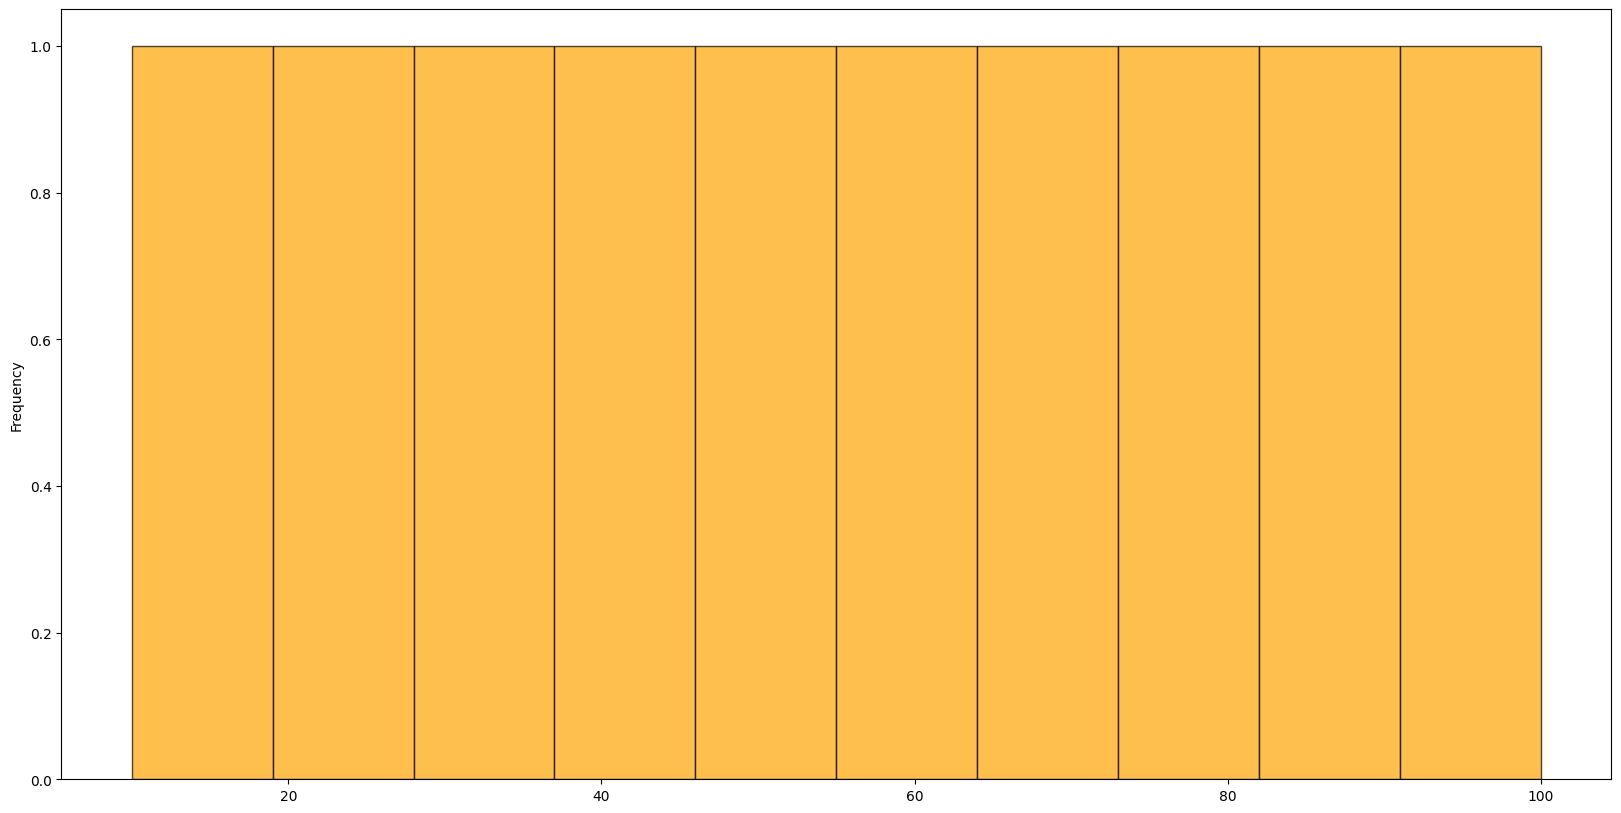

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.DataFrame({
    'user_data_for_hist': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
})

dataset['user_data_for_hist'].plot.hist(
    figsize=(20, 10),
    alpha=0.7,
    color='orange',
    edgecolor='black',
    grid=False
)

plt.show()

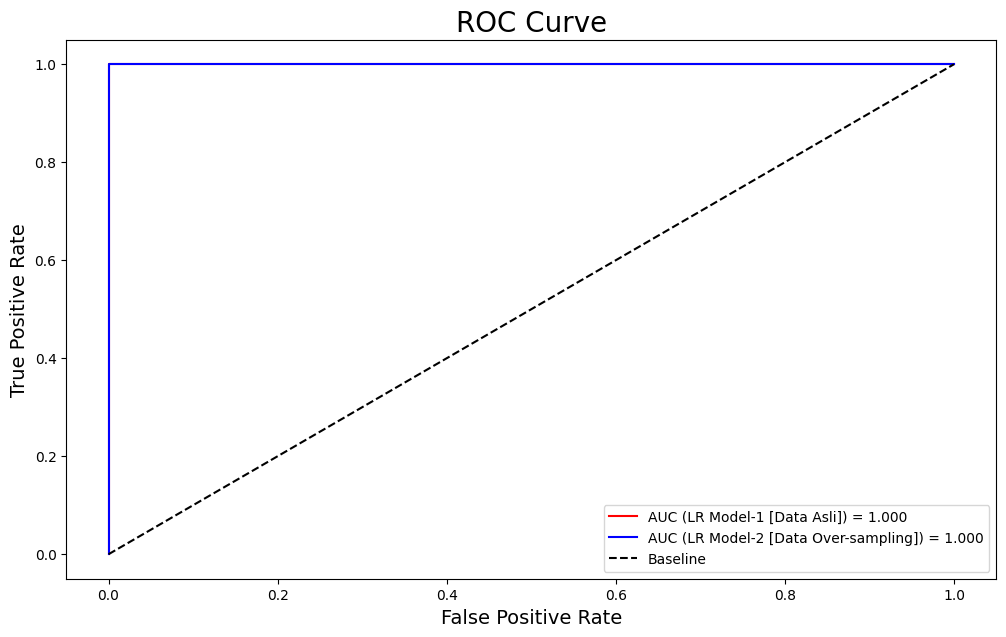

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
y_test = [0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
predictions1b = [0.1, 0.8, 0.9, 0.2, 0.7, 0.1, 0.9, 0.8, 0.4, 0.3]
predictions2b = [0.2, 0.9, 0.8, 0.3, 0.6, 0.2, 0.95, 0.85, 0.5, 0.4]
auc1 = roc_auc_score(y_test, predictions1b)
fpr1, tpr1, thresholds1 = roc_curve(y_test, predictions1b)
auc2 = roc_auc_score(y_test, predictions2b)
fpr2, tpr2, thresholds2 = roc_curve(y_test, predictions2b)
plt.figure(figsize=(12, 7))
plt.plot(fpr1, tpr1, label=f'AUC (LR Model-1 [Data Asli]) = {auc1:.3f}', color='red')
plt.plot(fpr2, tpr2, label=f'AUC (LR Model-2 [Data Over-sampling]) = {auc2:.3f}', color='blue')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend()
plt.show()

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
data = {
    'col1': [1, 2, 3],
    'col2': [4, 5, 6],
    'col3': [7, 8, 9],
    'col4': [10, 11, 12],
    'col5': [13, 14, 15],
    'col6': [16, 17, 18]
}
dataset = pd.DataFrame(data)
array = dataset.values
X = array[:, 1:6]
y = array[:, 0]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)

[[0.  0.  0.  0.  0. ]
 [0.5 0.5 0.5 0.5 0.5]
 [1.  1.  1.  1.  1. ]]


In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=2)
# instantiating the random over sampler
ros = RandomOverSampler()
# resampling x_train, y_train
X_ros, y_ros = ros.fit_resample(x_train, y_train)
# new class distribution
print(Counter(y_ros))
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVM
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

logmodel = LogisticRegression()

#1. Model1 dengan dataset asli
model1=logmodel.fit(x_train, y_train)
predictions1a = model1.predict(x_train)
predictions1b = model1.predict(x_test)
predictions1c = model1.predict_proba(x_test)[:,1]
print("-------Model-1: Logit Biner dengan Dataset Asli-------")
print("Kinerja Data Training:")
print(classification_report(y_train, predictions1a))
print(confusion_matrix(y_train, predictions1a))
print(accuracy_score(y_train, predictions1a))
print("Kinerja Data Testing:")
print(classification_report(y_test, predictions1b))
print(confusion_matrix(y_test, predictions1b))
print(accuracy_score(y_test, predictions1b))


#2. Model2 dengan dataset over-sampling
model2=logmodel.fit(X_ros, y_ros)
predictions2a = model2.predict(X_ros)
predictions2b = model2.predict(x_test)
predictions2c = model2.predict_proba(x_test)[:,1]
print("-------Model-2: Logit Biner dengan Dataset Over-sampling-------")
print("Kinerja Data Training:")
print(classification_report(y_ros, predictions2a))
print(confusion_matrix(y_ros, predictions2a))
print(accuracy_score(y_ros, predictions2a))
print("Kinerja Data Testing:")
print(classification_report(y_test, predictions2b))
print(confusion_matrix(y_test, predictions2b))
print(accuracy_score(y_test, predictions2b))

Counter({np.int64(2): 1, np.int64(1): 1})
-------Model-1: Logit Biner dengan Dataset Asli-------
Kinerja Data Training:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

[[1 0]
 [0 1]]
1.0
Kinerja Data Testing:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

[[0 0]
 [1 0]]
0.0
-------Model-2: Logit Biner dengan Dataset Over-sampling-------
Kinerja Data Training:
              precision    recall  f1-score   support

           1       1.00 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_